### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.10f}'.format)
pd.set_option('display.float_format', lambda x: ('%f' % x).rstrip('0').rstrip('.'))

In [2]:
df = pd.read_csv('orders_without_returns_df.csv')
df['date_sold'] = pd.to_datetime(df['date_sold'])
df['year'] = df['date_sold'].dt.year
df['month'] = df['date_sold'].dt.month

In [3]:
df.head()

,Order ID,Sale ID,Order,Transaction type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales,size,color,style,date_sold,month,year
0,5539800000000,17401000000000,#2069,Product,Point of Sale,No info,No info,No info,Jeans,No info,1,5,0,0,5,0,0.3,5.3,No info,Brown,No info,2024-01-01,1,2024
1,5539800000000,17401000000000,#2070,Product,Point of Sale,No info,No info,No info,Bodysuits,No info,1,5,0,0,5,0,0.3,5.3,No info,Black & White,No info,2024-01-01,1,2024
2,5539800000000,17401000000000,#2070,Product,Point of Sale,No info,No info,No info,Bodysuits,No info,1,5,0,0,5,0,0.3,5.3,No info,Black,Halter,2024-01-01,1,2024
3,5539970000000,17401500000000,#2071,Product,Point of Sale,No info,No info,No info,Dresses,No info,1,9,0,0,9,0,0.54,9.54,No info,Brown & White,No info,2024-01-01,1,2024
4,5539970000000,17401500000000,#2071,Product,Point of Sale,No info,No info,No info,Dresses,No info,1,9,0,0,9,0,0.54,9.54,No info,Blue,"With belt, wool",2024-01-01,1,2024


In [4]:
df['year'].unique()

array([2024], dtype=int32)

### Sales Performance Analysis

### Gross vs. Net Sales

In [5]:
# Gross vs. Net over Months
monthly_sales = df.groupby('month').agg({
    'Gross sales': 'sum',
    'Net sales': 'sum'
}).reset_index()

monthly_sales

,month,Gross sales,Net sales
0,1,1964.3,1788.53
1,2,2107.62,1702.36
2,3,1852.24,1789.74
3,4,339.99,335.99
4,5,952.86,868.91
5,6,1731.58,1493.37
6,7,2791.57,2312.98
7,8,238.24,206.8


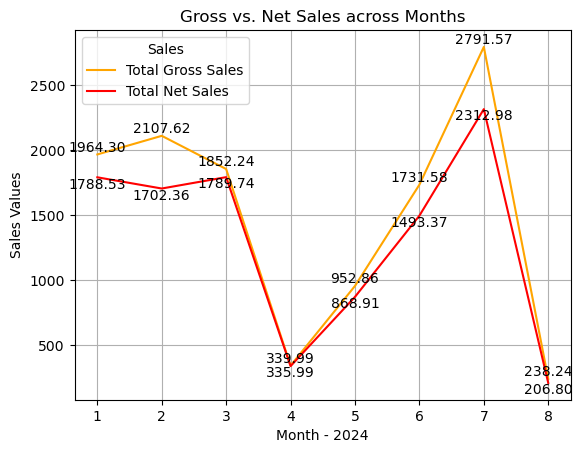

In [34]:
# plt.figure(figsize=(10, 12))
sns.lineplot(x='month', y='Gross sales', data=monthly_sales, color='orange', label = 'Total Gross Sales')
sns.lineplot(x='month', y='Net sales', data=monthly_sales, color='red', label = 'Total Net Sales')
plt.title('Gross vs. Net Sales across Months')
plt.ylabel('Sales Values')
plt.xlabel('Month - 2024')
plt.legend(title = 'Sales')
plt.grid(True)

## Annotation the values
for idx, row in monthly_sales.iterrows():
    plt.text(x=row['month'],  y=row['Gross sales'], s=f'{row["Gross sales"]:.2f}', color='black', ha='center', va='bottom')
    plt.text(x=row['month'],  y=row['Net sales'], s=f'{row["Net sales"]:.2f}', color='black', ha='center', va='top')

plt.savefig("gross_net_sales.png")

### Sales by Product

In [7]:
df[df['Product type']=='Sale']

,Order ID,Sale ID,Order,Transaction type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales,size,color,style,date_sold,month,year
150,5592550000000,17529900000000,#2160,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,9,0,0,9,0,0.54,9.54,No info,No info,No info,2024-02-03,2,2024
155,5596480000000,17540700000000,#2164,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,9,0,0,9,0,0.54,9.54,No info,No info,No info,2024-02-06,2,2024
158,5598160000000,17544100000000,#2165,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,26.5,-26.5,0,0,0,0,0,No info,No info,No info,2024-02-07,2,2024
160,5599690000000,17547200000000,#2166,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,9,0,0,9,0,0.54,9.54,No info,No info,No info,2024-02-08,2,2024
169,5601360000000,17550900000000,#2170,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,9,0,0,9,0,0.54,9.54,No info,No info,No info,2024-02-09,2,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,5832850000000,18234700000000,#2247,Product,Point of Sale,No info,No info,No info,Sale,No info,1,225,-45,0,180,0,10.8,190.8,No info,No info,No info,2024-06-15,6,2024
287,5832850000000,18234700000000,#2248,Product,Point of Sale,No info,No info,No info,Sale,No info,1,225,-45,0,180,0,10.8,190.8,No info,No info,No info,2024-06-15,6,2024
291,5851450000000,18290500000000,#2252,Product,Online Store,United States,Alabama,Daphne,Sale,Inspired Fashion 40,1,9,0,0,9,0,0,9,No info,No info,No info,2024-06-29,6,2024
319,5889830000000,18417300000000,#2271,Product,Point of Sale,No info,No info,No info,Sale,No info,1,80,0,0,80,0,4.8,84.8,No info,No info,No info,2024-07-27,7,2024


In [8]:
df['Product type'].unique()

array(['Jeans', 'Bodysuits', 'Dresses', 'Pants', 'Shorts', 'Accessories',
       'Apparel & accessories', 'Fascinators & hats', '2 piece set',
       'Jumpsuits & rompers', 'Yoga', 'Shirts & tops', 'No info',
       'Joggers', 'Skirts', 'Coats & jackets', 'Shirts & top',
       'Skirt suits', 'Blazers', 'Jumpsuits', 'Sale', 'Event',
       'Gift cards', 'Butterfly', 'Shirts'], dtype=object)

In [9]:
sales_by_product = df.groupby('Product type').agg({
    'Net sales': 'sum'
}).reset_index().sort_values(by='Net sales', ascending=False)

In [10]:
sales_by_product['Net sales'] = round(sales_by_product['Net sales'],2)

In [11]:
sample = sales_by_product.head(10)
sample

,Product type,Net sales
17,Sale,1585.98
7,Dresses,1488.7
1,Accessories,1440.83
16,Pants,961.71
8,Event,879.99
6,Coats & jackets,822.7
15,No info,762.65
20,Shirts & tops,722.42
14,Jumpsuits & rompers,590.54
23,Skirts,270.36


Text(0.5, 1.0, 'Total Net Sales by Product Type')

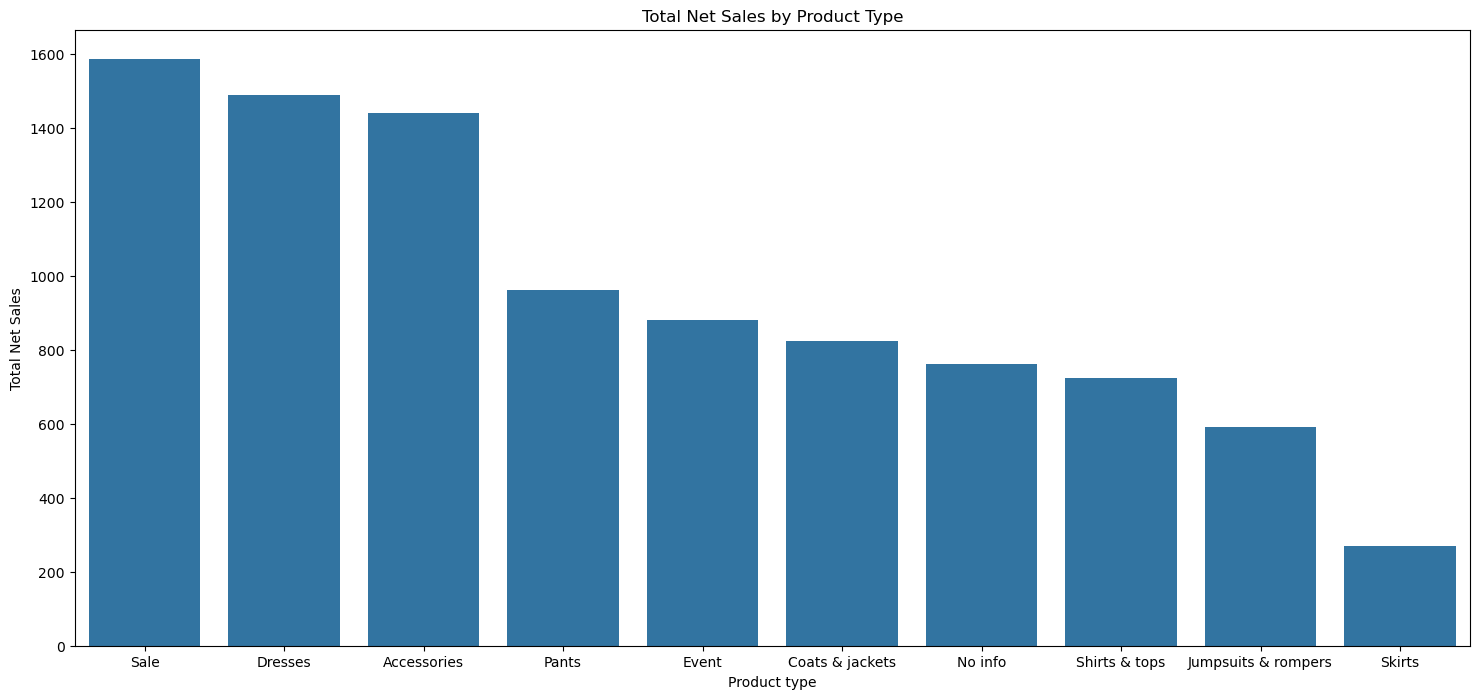

In [12]:
plt.figure(figsize=(18,8))
sns.barplot(data=sample, x='Product type', y='Net sales')
plt.ylabel('Total Net Sales')
plt.title('Total Net Sales by Product Type')

### Sales by Product Variants

In [13]:
df['size'].unique()

array(['No info', '1X', 'L', 'M', 'XL', 'S'], dtype=object)

In [14]:
df['color'].unique()

array(['Brown', 'Black & White', 'Black', 'Brown & White', 'Blue',
       'No info', 'Red', 'Tan', 'Green', 'Grey', 'Gold', 'Teal', 'White',
       'Candy', 'Orange', 'Pink & Yellow', 'Yellow', 'Blue & Green',
       'Pink', 'Red white black', 'Autumn', 'Brown & Black & White',
       'Silver', 'Pink & Green', 'Gray', 'Cream', 'Blue & Green & White',
       'White Rose', 'Pink white yellow', 'Blue & Grey',
       'Pink redy yellow', 'Hot Pink', 'Red Velvet', 'Red & Pink',
       'Blue & Teal', 'Pink & White', 'Teal & Blue', 'Pleated',
       'Red Satin'], dtype=object)

In [15]:
df['style'].unique()

array(['No info', 'Halter', 'With belt, wool', 'Shirt-dress', 'Romper',
       'Feathure', 'Rose Pearl', 'Checkered', 'Multi layered tiered',
       'Blush Floral', 'Yolanda', 'Pearl Yolanda', 'Floral Yolanda',
       'Stretch', 'Charm', 'Lace', 'Sweater', 'Long sleeve',
       'Flower lace', 'Maroon stretch', 'Leaf spaghetti', 'Zebra',
       'Popcorn Flare', 'Mess stretch', 'Paisley', 'Satin Silk Curvy',
       'Flower', 'Pearl', 'Leater', 'Leather', 'Pear',
       'Puffy Sleeve Shift', 'Organza Flower Brooch', 'Flare Sleeve',
       'Flower Tassel', 'R&J', 'Denim', 'With metal ring',
       'Cheeta print sheen', 'Leopard', 'Stripped', 'Striped', 'Floral',
       'With cuff', 'Olive', 'Wool', 'Gold', 'Puffy Sleeve', 'Turtle',
       'Cowgirl Barbie', 'Long Pearl', 'Mock neck fitted',
       'Vegan Leather Peplum', 'Mardi Gras', 'Cuff', 'Mine Your Business',
       'Leg string', 'Swirl', 'With belt', 'Satin Wide Leg', 'Tube',
       'Cheerleader', 'Belly', 'Mid section peekaboo', 'Dia

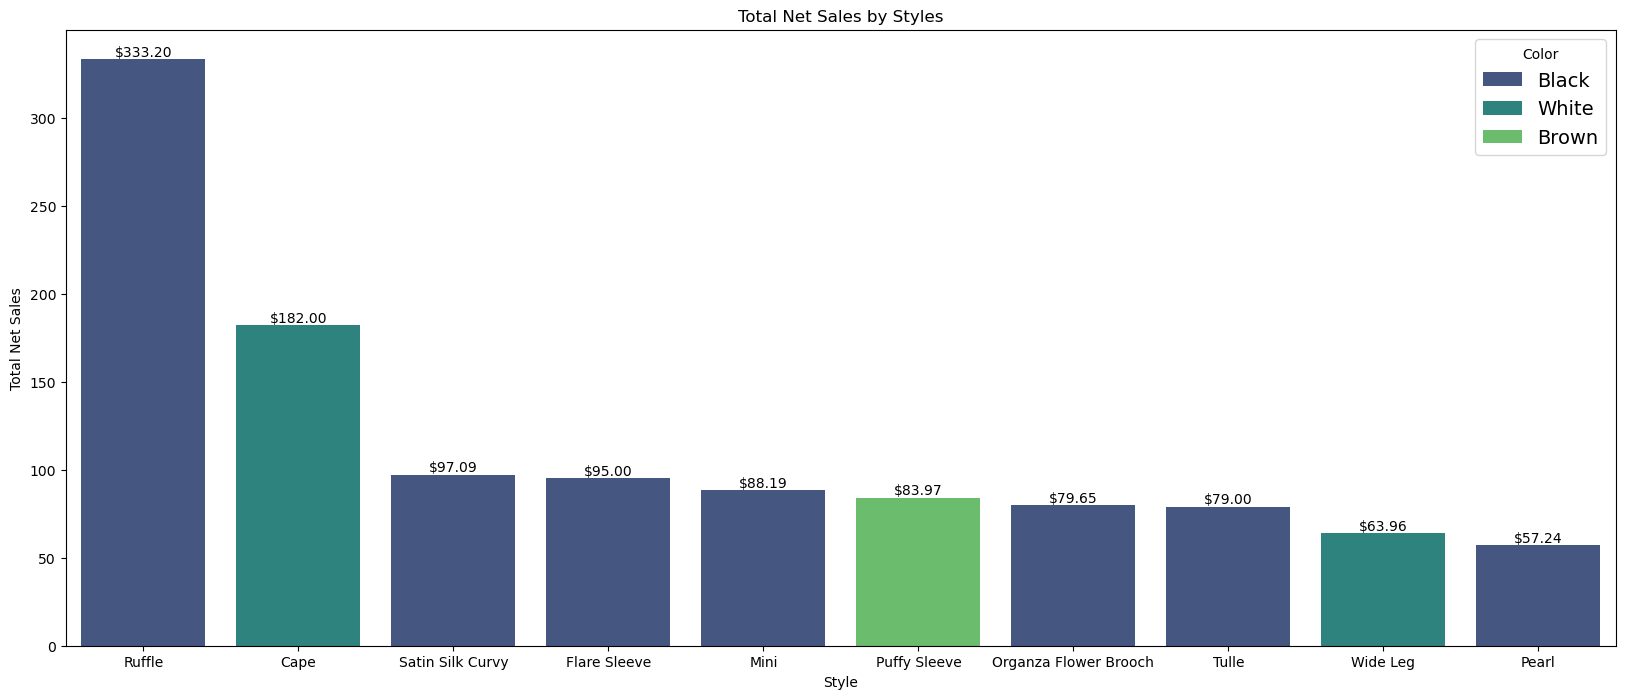

In [35]:
sample = df[(df['style'] != 'No info' )& (df['color'] != 'No info')].groupby(['color', 'style']).agg({
                                                                                                'Net sales': 'sum'
                                                                                                }).reset_index().sort_values(by = 'Net sales', ascending=False).head(10)

plt.figure(figsize=(20, 8))
sns.barplot(data = sample, x='style', y='Net sales', hue='color', palette='viridis')
plt.xlabel("Style")
plt.ylabel("Total Net Sales")
plt.title('Total Net Sales by Styles')
plt.legend(title = 'Color', fontsize = 14)

for idx, row in sample.iterrows():
    plt.text(x = row['style'], y = row['Net sales'], s = f'${row["Net sales"]:.2f}', color='black', ha='center', va='bottom')

In [17]:
# There are only 3 transactions contributing to the Ruffle style sales
df[df['style']=='Ruffle'][['Product type', 'Net sales', 'style', 'color']]

,Product type,Net sales,style,color
214,Coats & jackets,119,Ruffle,Black
240,Coats & jackets,119,Ruffle,Black
285,Coats & jackets,95.2,Ruffle,Black


In [18]:
## Count the styles with Product type
df[df['style']!='No info'].groupby(['Product type', 'style']).agg(
    Count_style=('style','count'),
    Total_net_sales = ('Net sales', 'sum')).reset_index().sort_values(by='Count_style', ascending=False)

,Product type,style,Count_style,Total_net_sales
23,Accessories,R&J jewlery,8,167.31
10,Accessories,Flower,5,111.54
39,Coats & jackets,Cape,4,182
124,Shirts & tops,Puffy Sleeve,4,108.97
98,Pants,Paisley,4,268.74
...,...,...,...,...
42,Coats & jackets,Prada,1,125
41,Coats & jackets,Leater,1,37.5
40,Coats & jackets,Denim,1,25
38,Bodysuits,Star,1,5


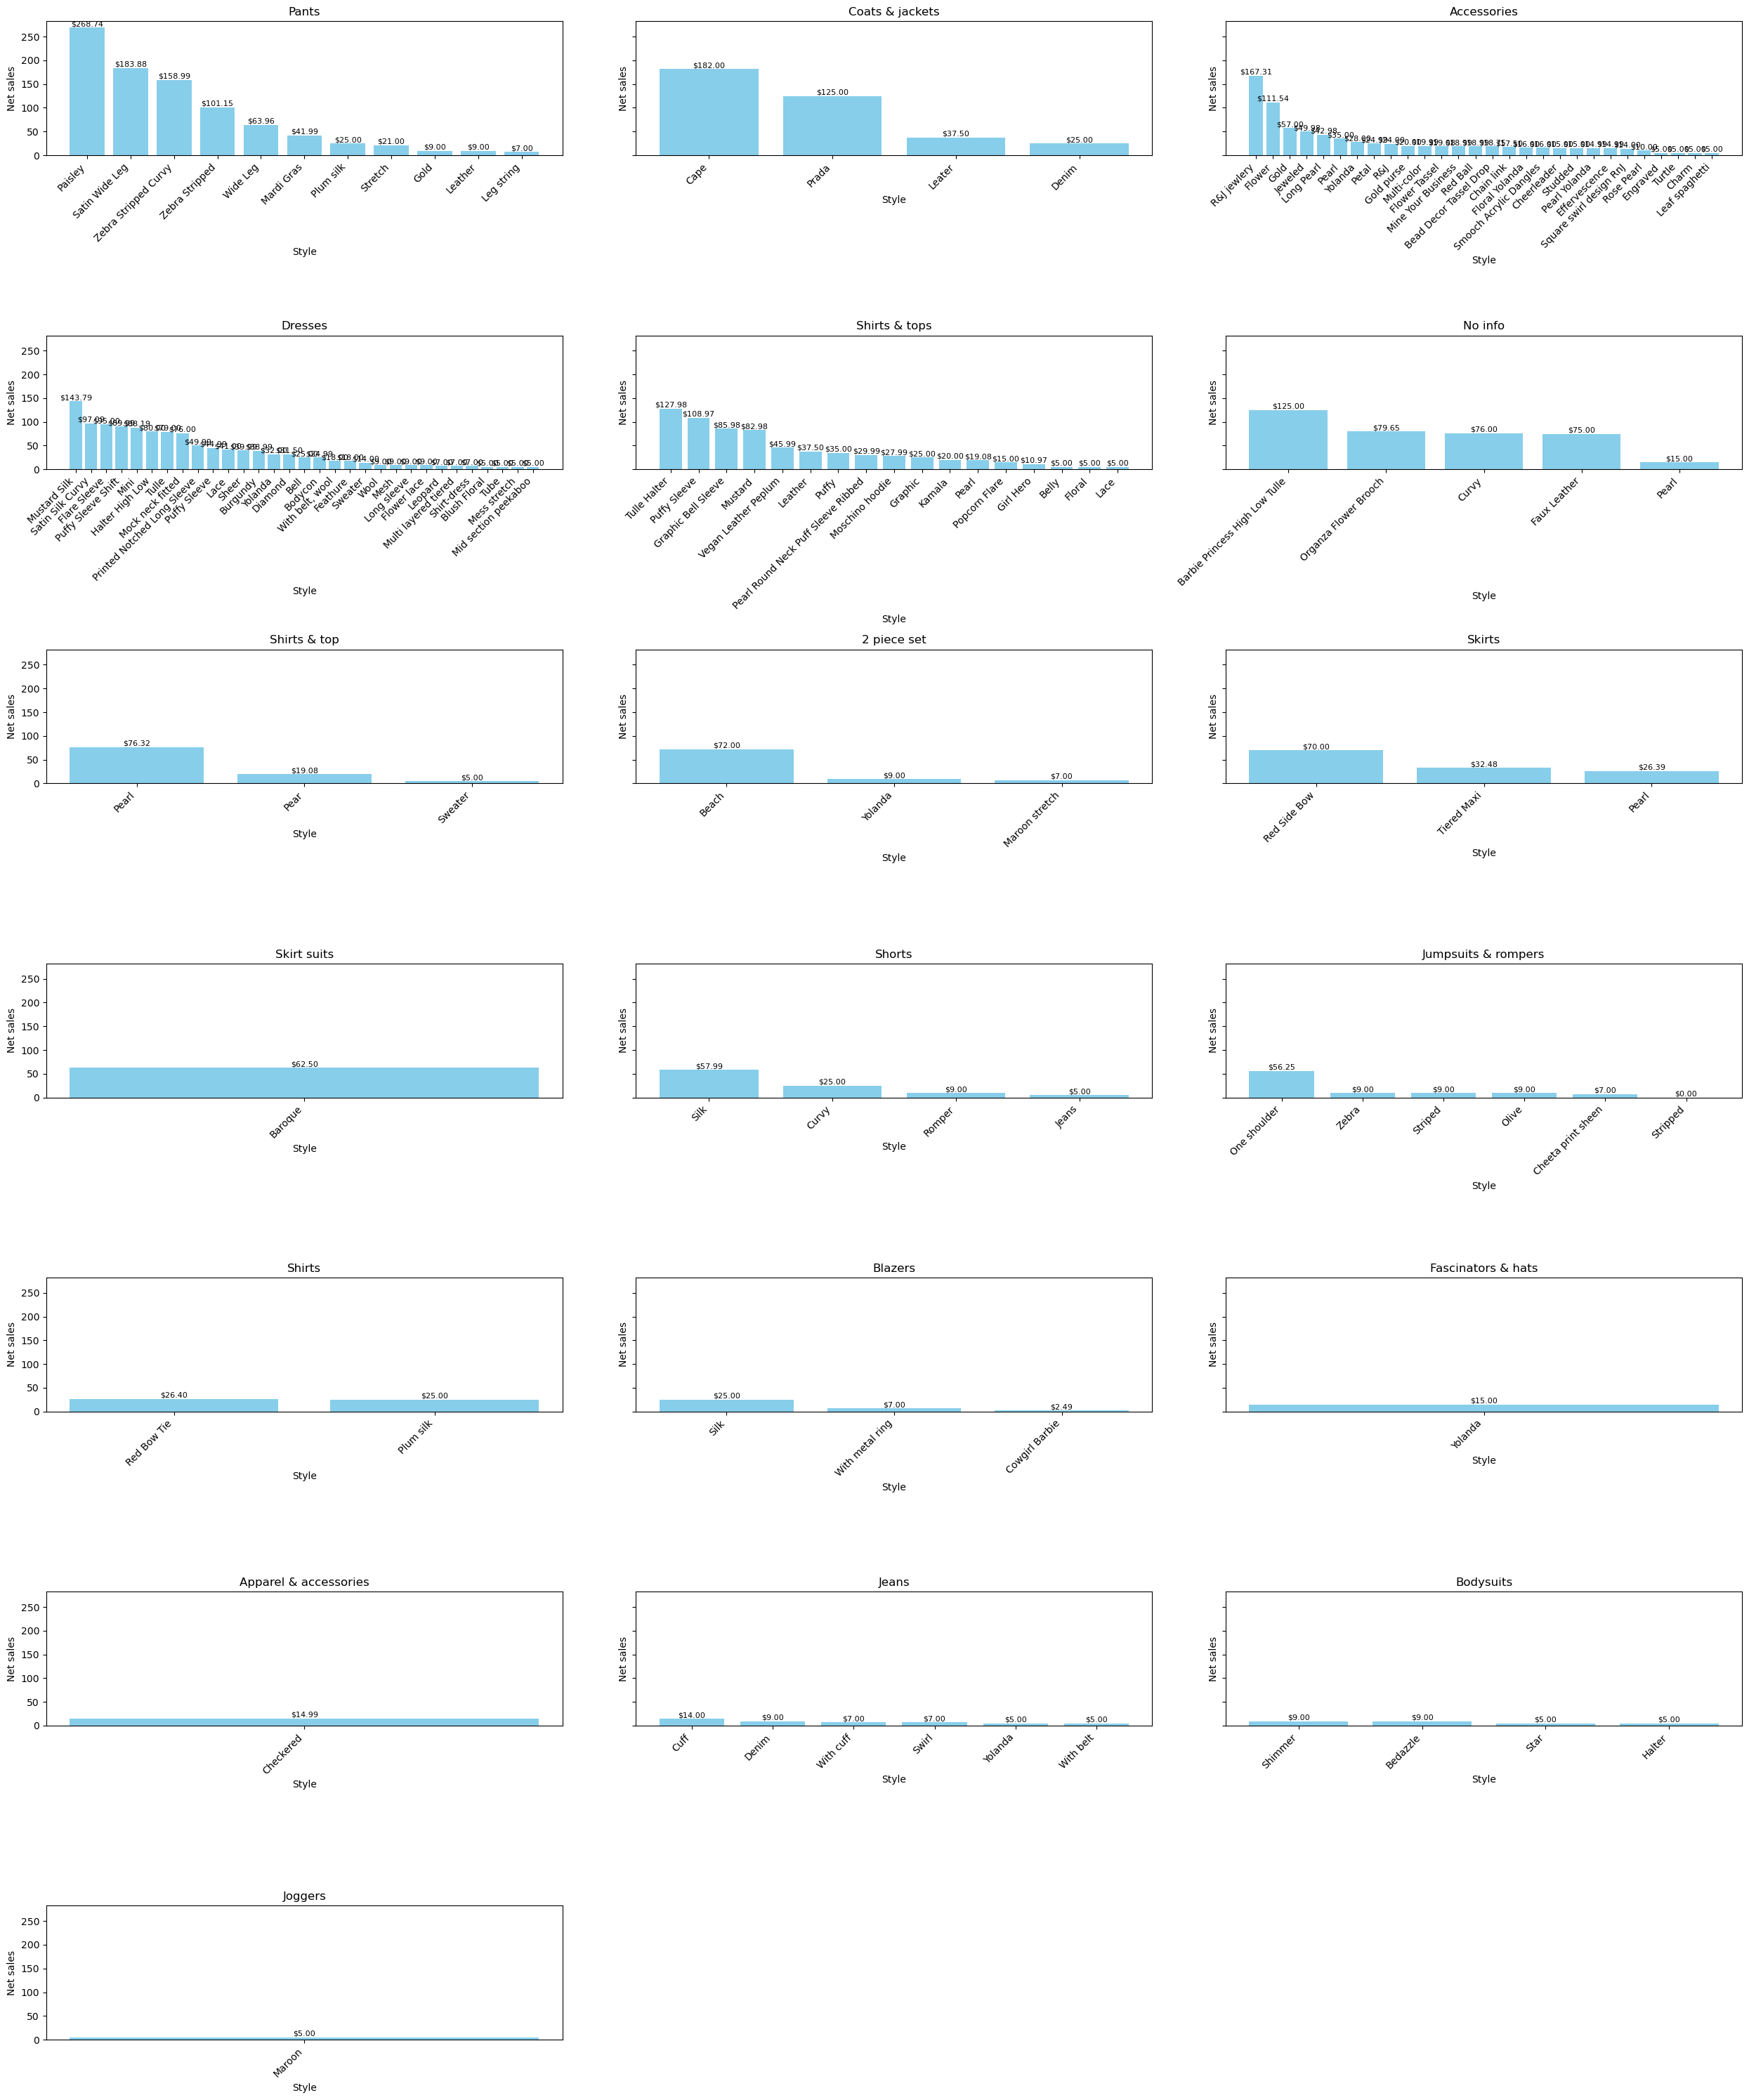

In [43]:
sample = df[(~df['style'].isin(['No info', 'Ruffle']))].groupby(['Product type', 'style']).agg({'Net sales': 'sum'}).reset_index().sort_values(by='Net sales', ascending=False)
product_types = sample['Product type'].unique()
num_rows = len(product_types) // 3 + (len(product_types) % 3 > 0)  # Add an extra row if there's a remainder

fig, axes = plt.subplots(ncols = 3, 
                         nrows = num_rows, 
                         figsize=(25,30), 
                         sharey=True)

axes = axes.flatten()


for idx, product_type in enumerate(product_types):
    product_data = sample[sample['Product type'] == product_type]

    axes[idx].bar(x=product_data['style'], height=product_data['Net sales'], color='skyblue')

    axes[idx].set_title(product_type)
    axes[idx].set_xlabel('Style')
    axes[idx].set_ylabel('Net sales')

    axes[idx].set_xticks(range(len(product_data['style'])))
    axes[idx].set_xticklabels(product_data['style'], rotation=45, ha='right')

    ## Add data notations
    for bar in axes[idx].patches: # Iterate through each bar
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2, height,
                       f'${height:.2f}',
                       ha='center', va='bottom', fontsize=8)
        

# Hide any unused subpots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('Net_Sales_by_ProductType_Style.png')
plt.show()

### Sales vs. Product Type over Months

In [44]:
sample = df.groupby(['month', 'Product type']).agg({
    'Net sales': 'sum'
}).reset_index().sort_values(by='Net sales', ascending=False)

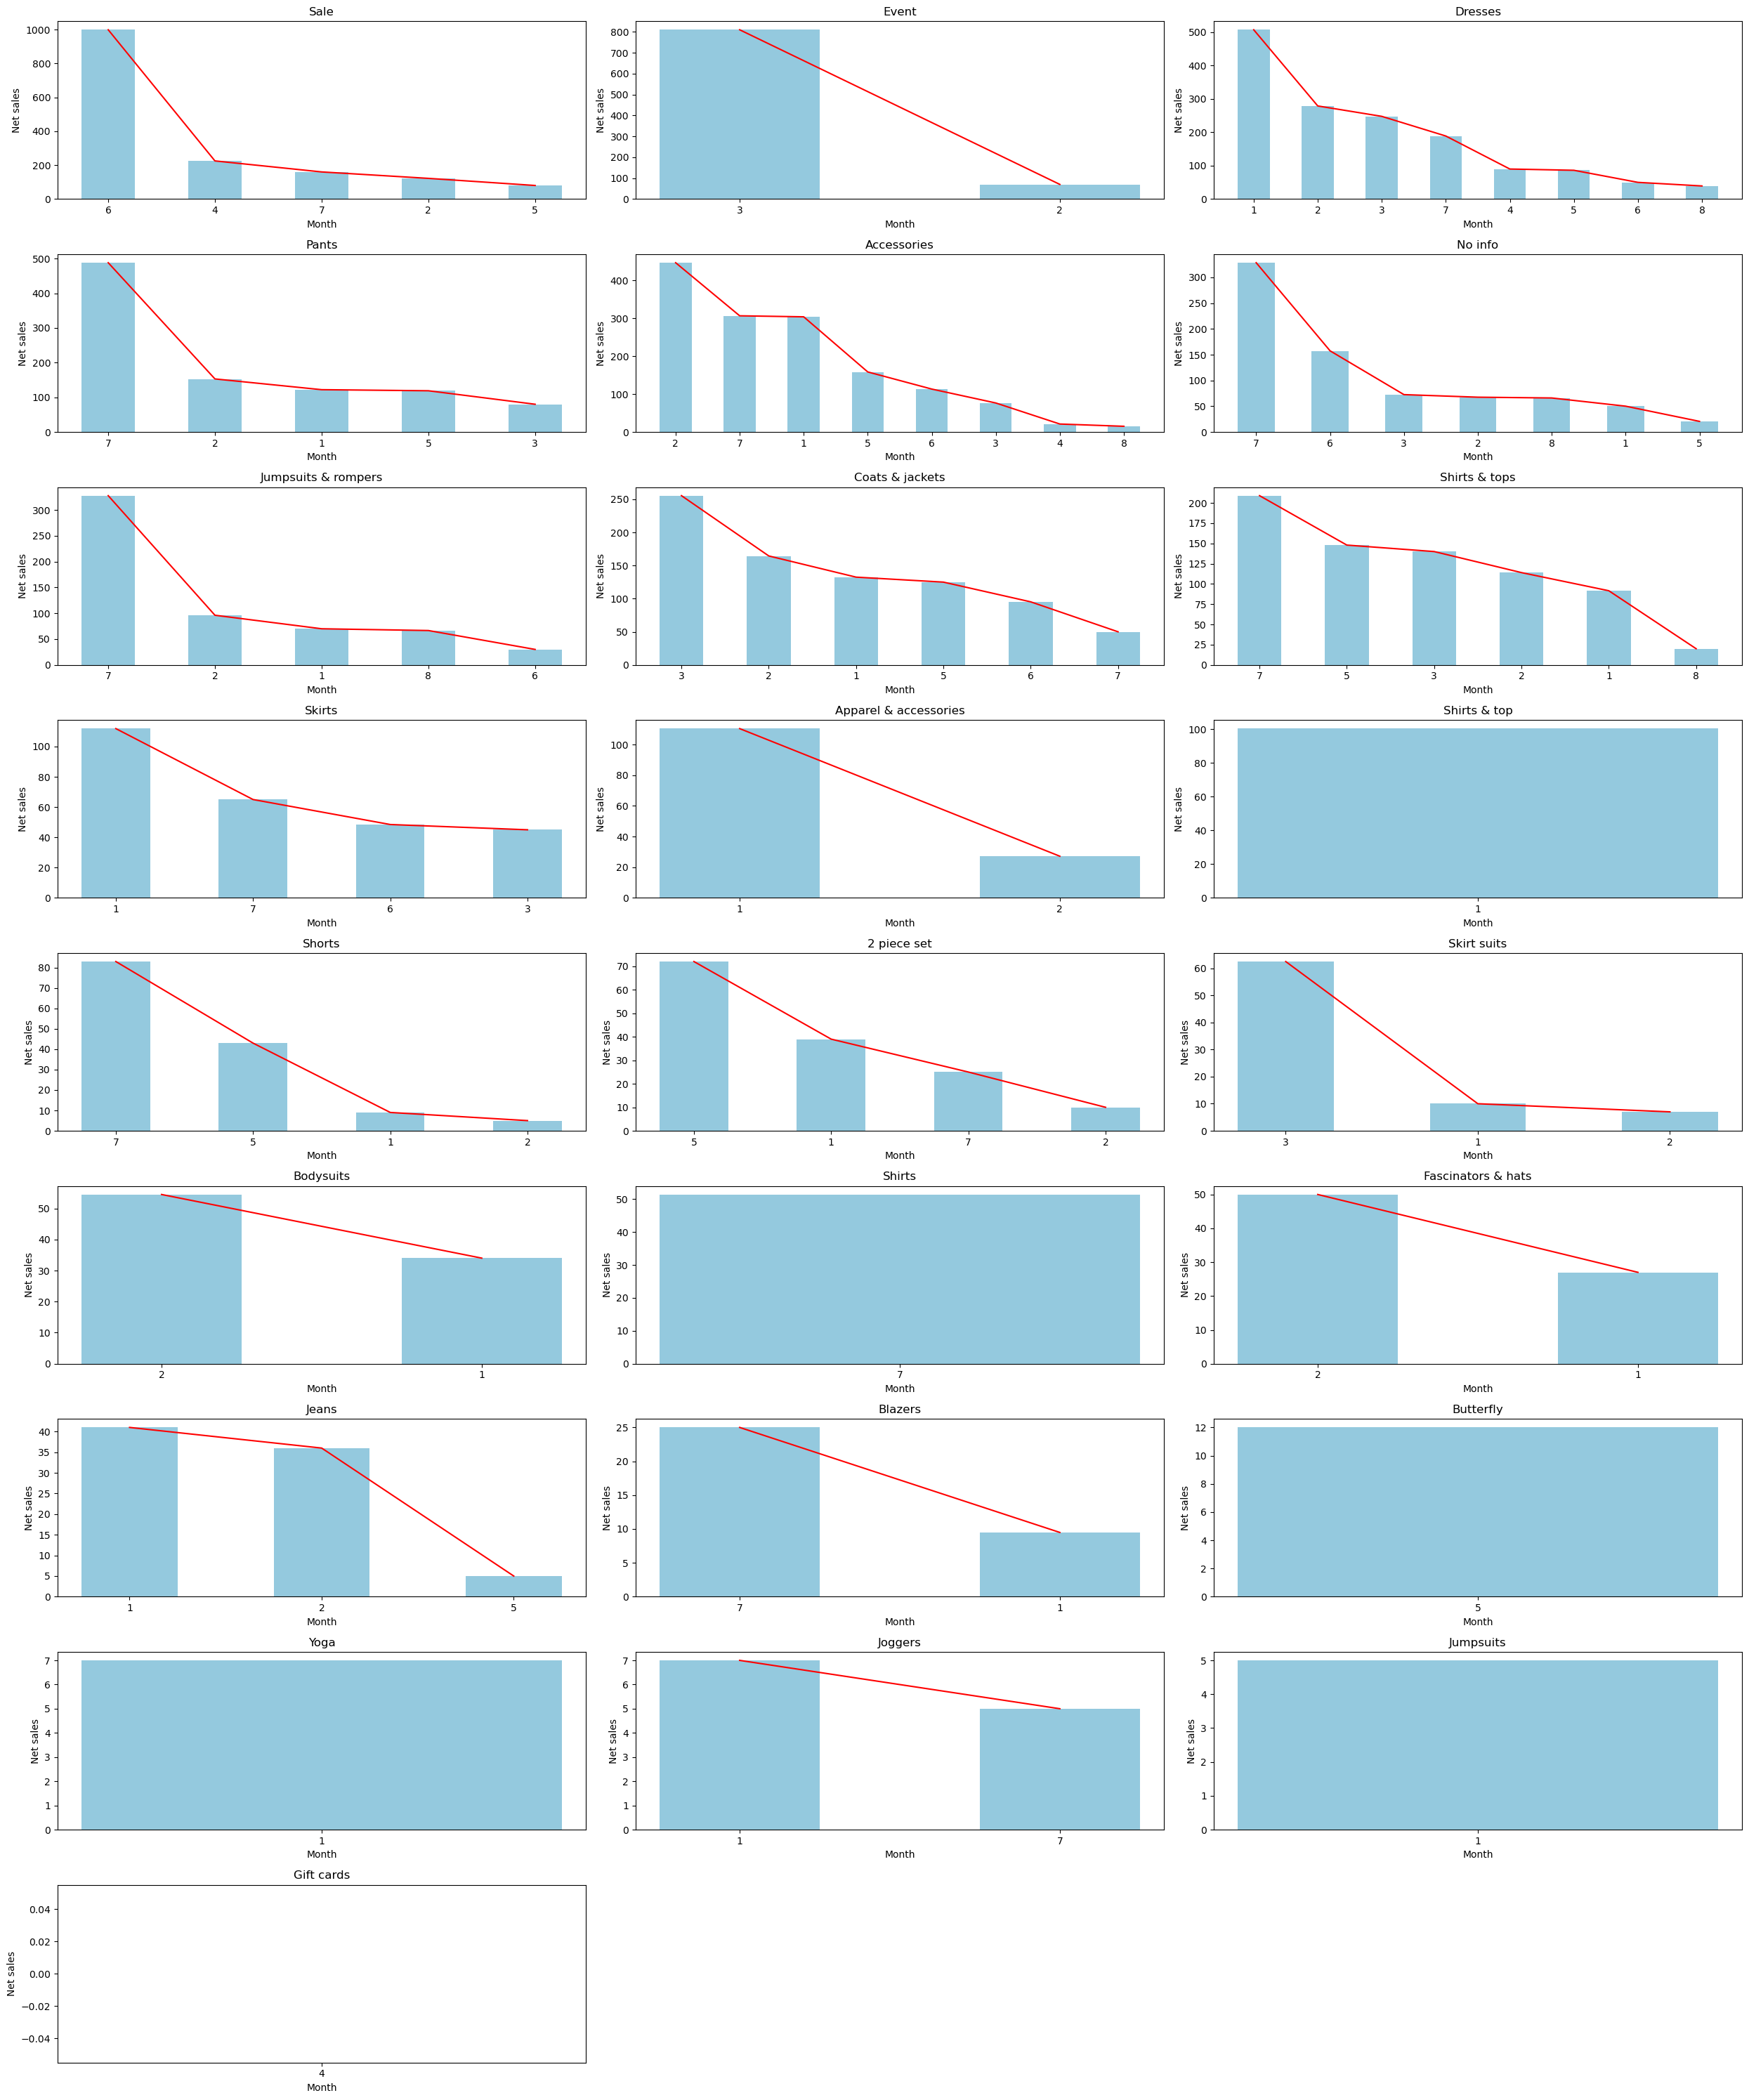

In [49]:
sample['month'] = sample['month'].astype(str) # Convert month to string if it's not already
product_types = sample['Product type'].unique()
num_rows = len(product_types) // 3 + (len(product_types) % 3 > 0)  # Add an extra row if there's a remainder

fig, ax = plt.subplots(nrows=num_rows,
                       ncols=3,
                       figsize=(25, 30))

# Flatten the axes array and loop over product types
axes = ax.flatten()

for idx, ax in enumerate(axes):
    if idx < len(product_types):  # Ensure idx is within bounds of product_types array
        product_type = product_types[idx]
        product_data = sample[sample['Product type'] == product_type]

        # Convert 'month' to a categorical type to align bars and lines
        sample.loc[sample['Product type'] == product_type, 'month'] = pd.Categorical(
            sample.loc[sample['Product type'] == product_type, 'month'], ordered=True)
        
        # Plotting the line for Net sales by month for each product type
        sns.barplot(x='month', y='Net sales', data=product_data, ax=ax, width=0.5, color='skyblue')
        sns.lineplot(x='month', y='Net sales', data=product_data, ax=ax, color='red')
        ax.set_title(product_type)
        ax.set_xlabel('Month')
        ax.set_ylabel('Net sales')
    else:
        ax.axis('off')  # Hide empty subplots

plt.tight_layout()
plt.savefig("Net_Sales_by_ProductType_Months.png")
plt.show()

In [22]:
df[df['Product type']=='Jumpsuits']

,Order ID,Sale ID,Order,Transaction type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales,size,color,style,date_sold,month,year
117,5578270000000,17493500000000,#2139,Product,Point of Sale,No info,No info,No info,Jumpsuits,No info,1,5,0,0,5,0,0.3,5.3,No info,White,No info,2024-01-27,1,2024


### Sale Product Type

- Are these products discounted?

In [23]:
sale_df_discount = df[(df['Product type']=='Sale') & (df['Discounts'] != 0)]

In [24]:
sale_df = df[df['Product type'] =='Sale']

In [25]:
sale_df

,Order ID,Sale ID,Order,Transaction type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales,size,color,style,date_sold,month,year
150,5592550000000,17529900000000,#2160,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,9,0,0,9,0,0.54,9.54,No info,No info,No info,2024-02-03,2,2024
155,5596480000000,17540700000000,#2164,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,9,0,0,9,0,0.54,9.54,No info,No info,No info,2024-02-06,2,2024
158,5598160000000,17544100000000,#2165,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,26.5,-26.5,0,0,0,0,0,No info,No info,No info,2024-02-07,2,2024
160,5599690000000,17547200000000,#2166,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,9,0,0,9,0,0.54,9.54,No info,No info,No info,2024-02-08,2,2024
169,5601360000000,17550900000000,#2170,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,9,0,0,9,0,0.54,9.54,No info,No info,No info,2024-02-09,2,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,5832850000000,18234700000000,#2247,Product,Point of Sale,No info,No info,No info,Sale,No info,1,225,-45,0,180,0,10.8,190.8,No info,No info,No info,2024-06-15,6,2024
287,5832850000000,18234700000000,#2248,Product,Point of Sale,No info,No info,No info,Sale,No info,1,225,-45,0,180,0,10.8,190.8,No info,No info,No info,2024-06-15,6,2024
291,5851450000000,18290500000000,#2252,Product,Online Store,United States,Alabama,Daphne,Sale,Inspired Fashion 40,1,9,0,0,9,0,0,9,No info,No info,No info,2024-06-29,6,2024
319,5889830000000,18417300000000,#2271,Product,Point of Sale,No info,No info,No info,Sale,No info,1,80,0,0,80,0,4.8,84.8,No info,No info,No info,2024-07-27,7,2024


In [26]:
sale_df_discount

,Order ID,Sale ID,Order,Transaction type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales,size,color,style,date_sold,month,year
158,5598160000000,17544100000000,#2165,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,26.5,-26.5,0,0,0,0,0,No info,No info,No info,2024-02-07,2,2024
177,5610270000000,17572200000000,#2173,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,57,-48,0,9,0,0.54,9.54,No info,No info,No info,2024-02-15,2,2024
196,5622810000000,17600000000000,#2187,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,39.99,-30.99,0,9,0,0.54,9.54,No info,No info,No info,2024-02-23,2,2024
201,5622820000000,17600000000000,#2188,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,20,-11,0,9,0,0.54,9.54,No info,No info,No info,2024-02-23,2,2024
210,5624480000000,17603500000000,#2191,Product,Point of Sale,No info,No info,No info,Sale,Inspired Fashion 40,1,9,-4,0,5,0,0.3,5.3,No info,No info,No info,2024-02-24,2,2024
283,5832820000000,18234600000000,#2245,Product,Point of Sale,No info,No info,No info,Sale,No info,1,225,-45,0,180,0,10.8,190.8,No info,No info,No info,2024-06-15,6,2024
286,5832850000000,18234700000000,#2247,Product,Point of Sale,No info,No info,No info,Sale,No info,1,225,-45,0,180,0,10.8,190.8,No info,No info,No info,2024-06-15,6,2024
287,5832850000000,18234700000000,#2248,Product,Point of Sale,No info,No info,No info,Sale,No info,1,225,-45,0,180,0,10.8,190.8,No info,No info,No info,2024-06-15,6,2024


In [27]:
sale_df_non_discount = df[(df['Product type']=='Sale') & (df['Discounts'] == 0)]

In [28]:
sale_df_non_discount.drop(columns=['Order ID', 'Sale ID', 'Order', 'date_sold', 'Sales channel',
       'Shipping country', 'Shipping region', 'Shipping city', 'Product type']).nunique()

Transaction type    1
Product vendor      3
Net quantity        1
Gross sales         4
Discounts           1
Returns             1
Net sales           4
Shipping            1
Taxes               5
Total sales         5
size                1
color               1
style               1
month               5
year                1
dtype: int64

In [29]:
sale_df_non_discount.columns

Index(['Order ID', 'Sale ID', 'Order', 'Transaction type', 'Sales channel',
       'Shipping country', 'Shipping region', 'Shipping city', 'Product type',
       'Product vendor', 'Net quantity', 'Gross sales', 'Discounts', 'Returns',
       'Net sales', 'Shipping', 'Taxes', 'Total sales', 'size', 'color',
       'style', 'date_sold', 'month', 'year'],
      dtype='object')

### Sales by Channels / Vendors

In [53]:
sales_channel = df.copy()
sample = sales_channel.groupby('Sales channel').agg({'Net sales': 'sum', 'Product vendor': 'count'}).reset_index()   

In [54]:
heatmap_data = sample.pivot_table(
    values = 'Net sales',
    index = 'Sales channel',
    columns = 'Product vendor',
    aggfunc = 'sum'
)

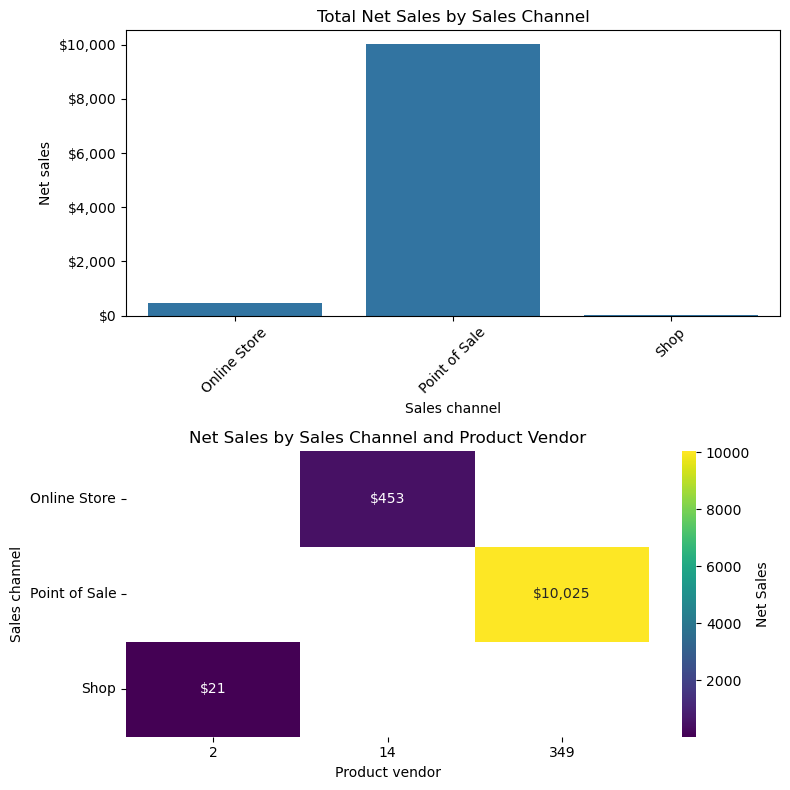

In [56]:
import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 8))
plt.subplots_adjust(hspace=3)

sns.barplot(data = sample, x='Sales channel', y='Net sales', ax=ax1)
ax1.set_title('Total Net Sales by Sales Channel')
ax1.tick_params(axis='x', rotation=45)
ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))

sns.heatmap(data = heatmap_data, annot =True, fmt='.0f', cmap='viridis', ax=ax2, cbar_kws={'label': 'Net Sales'})
for text in ax2.texts:
    text.set_text(f'${int(text.get_text()):,}')
ax2.set_title('Net Sales by Sales Channel and Product Vendor')

plt.tight_layout()
plt.savefig('Heatmap_Net_Sales.png')
plt.show()

In [33]:
heatmap_data

Product vendor,2,14,349
Sales channel,,,
Online Store,NaN,452.99,NaN
Point of Sale,NaN,NaN,10025.12
Shop,20.57,NaN,NaN
